Tentative Application of Simple Functionalities with Tiingo API

In this notebook, we browsed through the Tiingo website and applied for an API key. We then closely studied the instructions on the website regarding how to make requests to different categories of financial data from Tiingo. We then write some python code in our local machine using the "request" library in python with the API key we got from Tiingo to download data to our local machine and conduct some very basic analysis. 

The analysis we did includes: 

Part1: Request the price data for a single stock/ stock index for a specific day(e.g. Open, High, Low, Div, etc.) from Tiingo and create a view to present them in our local machine; 

Part 2: Request the data for multiple assets over a constant time horizon, say price for AAPL, AMZN, and GOOGL over the same period from Jan.1st, 2023 to Jan.1st, 2024 and plot them on the same graph for visual analysis; 

Part 3: Request the weekly closing price for all of the 30 component stocks of DJIA from Tiingo and calculate their weekly average return over the period from Jan.1st, 2023 to Jan.1st, 2024, and then create a portfolio by specifying the weight of each of these 30 stocks so that the portfolio's return is at least 8%. 

Part 1: 

In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Tiingo API key
api_key = '5670a78654dee008fca8532955953418082147ed'
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}

# This URL is for getting end-of-day stock prices. Replace 'AAPL' with your desired stock symbol.
url = 'https://api.tiingo.com/tiingo/daily/AAPL/prices'

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Failed to fetch data: {response.status_code}")



[{'adjClose': 182.31, 'adjHigh': 184.85, 'adjLow': 181.665, 'adjOpen': 183.42, 'adjVolume': 48546450, 'close': 182.31, 'date': '2024-02-16T00:00:00+00:00', 'divCash': 0.0, 'high': 184.85, 'low': 181.665, 'open': 183.42, 'splitFactor': 1.0, 'volume': 48546450}]


Part 2: 

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_api_key_here' with your actual Tiingo API key
api_key = '5670a78654dee008fca8532955953418082147ed'
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}

symbols = ['AAPL', 'AMZN', 'GOOGL']  # The stock symbols you want to fetch
data_frames = []  # A list to store our data frames

# Define the start and end dates for the historical data
start_date = '2023-01-01'
end_date = '2024-01-01'

for symbol in symbols:
    url = f'https://api.tiingo.com/tiingo/daily/{symbol}/prices?' \
          f'startDate={start_date}&endDate={end_date}'
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        # Convert the response into a DataFrame
        df = pd.DataFrame(response.json())
        
        # Rename the column with the closing price and date
        df.rename(columns={'close': f'{symbol}_close', 'date': f'{symbol}_date'}, inplace=True)
        
        # Convert the date column to datetime
        df[f'{symbol}_date'] = pd.to_datetime(df[f'{symbol}_date'])
        
        # We only need the date and close price columns
        df = df[[f'{symbol}_date', f'{symbol}_close']]
        
        data_frames.append(df)
    else:
        print(f"Failed to fetch data for {symbol}: {response.status_code}")



/var/folders/0j/x_8qtky976s81m7_kz8yh2z80000gn/T/ipykernel_73942/1806922200.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:

# Merge all the data frames on the date column
df_merged = pd.DataFrame()
for df in data_frames:
    symbol = df.columns[1].replace('_close', '')  # Extract the symbol from the column name
    if df_merged.empty:
        df_merged = df
        df_merged.rename(columns={f'{symbol}_date': 'date'}, inplace=True)
    else:
        df_merged = df_merged.merge(df, left_on='date', right_on=f'{symbol}_date', how='outer')
        df_merged.drop(columns=[f'{symbol}_date'], inplace=True)

/var/folders/0j/x_8qtky976s81m7_kz8yh2z80000gn/T/ipykernel_73942/1415429960.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)  # Forward fill any missing data


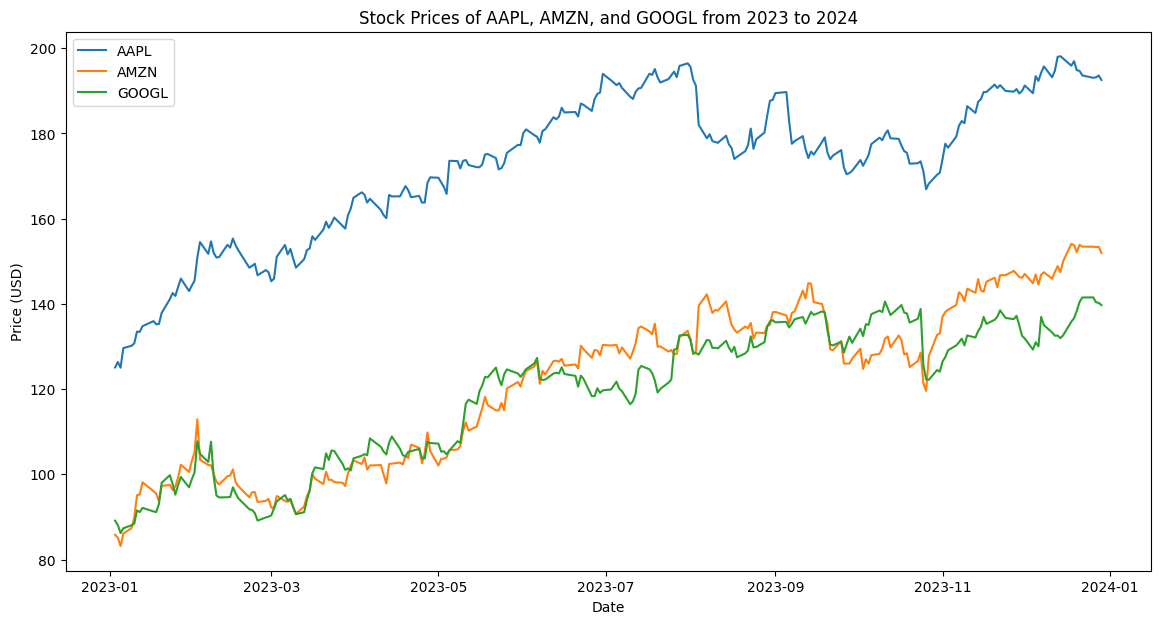

In [ ]:
# Clean up any missing data
df_merged.fillna(method='ffill', inplace=True)  # Forward fill any missing data

# Plotting the data
plt.figure(figsize=(14, 7))
for column in df_merged.columns[1:]:  # Skip the date column
    plt.plot(df_merged['date'], df_merged[column], label=column.replace('_close', ''))

plt.title('Stock Prices of AAPL, AMZN, and GOOGL from 2023 to 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Part 3: 

3a):

In [ ]:
import requests
import pandas as pd

# Define your API key, headers, and the date range
api_key = '5670a78654dee008fca8532955953418082147ed'
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}
start_date = '2023-01-01'
end_date = '2024-01-01'

# List of DJIA stock symbols (you'll need to define the exact symbols)
djia_symbols = ['UNH' , 'MSFT', 'GS', 'HD', 'CAT' , 'CRM' , 'MCD' , 'AMGN' , 'V' , 'TRV' , 'AXP' , 'BA' , 'HON' , 'IBM' , 'AAPL' , 'JPM' , 'WMT' , 'PG' , 'JNJ' , 'CVX' , 'MRK' , 'DIS' , 'NKE' , 'MMM' , 'KO' , 'DOW' , 'CSCO' , 'INTC' , 'VZ' , 'WBA']  # Replace ... with the rest of the DJIA symbols

# Fetch the weekly closing prices
prices = {}
for symbol in djia_symbols:
    url = f'https://api.tiingo.com/tiingo/daily/{symbol}/prices?' \
          f'startDate={start_date}&endDate={end_date}&resampleFreq=weekly'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        prices[symbol] = pd.DataFrame(response.json())
    else:
        print(f"Failed to fetch data for {symbol}: {response.status_code}")


3b):

In [ ]:
# Continuing from the previous code snippet where we fetched the weekly closing prices
# Now we will calculate the average weekly returns for each of the 30 stocks

# Placeholder list for the DJIA symbols, replace with actual symbols
djia_symbols = ['UNH' , 'MSFT', 'GS', 'HD', 'CAT' , 'CRM' , 'MCD' , 'AMGN' , 'V' , 'TRV' , 'AXP' , 'BA' , 'HON' , 'IBM' , 'AAPL' , 'JPM' , 'WMT' , 'PG' , 'JNJ' , 'CVX' , 'MRK' , 'DIS' , 'NKE' , 'MMM' , 'KO' , 'DOW' , 'CSCO' , 'INTC' , 'VZ' , 'WBA']

# Assuming 'prices' is a dictionary containing the fetched weekly price data
# Initialize an empty dictionary to store the average weekly returns
average_weekly_returns = {}

# Calculate the average weekly returns for each stock
for symbol in djia_symbols:
    # Skip if the symbol data is not fetched
    if symbol not in prices:
        continue
    
    # Calculate weekly returns for the symbol
    # Using 'adjClose' here, replace with 'close' if 'adjClose' is not available
    prices[symbol]['weekly_return'] = prices[symbol]['adjClose'].pct_change()
    
    # Calculate the average of the weekly returns, skipping the first NaN value
    average_weekly_returns[symbol] = prices[symbol]['weekly_return'].iloc[1:].mean()

# Now let's print the average weekly returns for each stock
average_weekly_returns



{'UNH': 0.0009769033314528071,
 'MSFT': 0.008763378420914899,
 'GS': 0.003690339857180413,
 'HD': 0.0025363129835789026,
 'CAT': 0.0048654157240346435,
 'CRM': 0.013103782726156452,
 'MCD': 0.002383939653911696,
 'AMGN': 0.003749674212339281,
 'V': 0.004567941638291473,
 'TRV': 0.0012988894186586478,
 'AXP': 0.005761020159905666,
 'BA': 0.006031008112999466,
 'HON': -0.00019373216038245044,
 'IBM': 0.0035172214419658277,
 'AAPL': 0.0068442418253204735,
 'JPM': 0.005882418080787595,
 'WMT': 0.0023842564235107147,
 'PG': 0.00016829533186741056,
 'JNJ': -0.0008754398545827074,
 'CVX': -0.002130635540461007,
 'MRK': 0.0018685919609351983,
 'DIS': 0.0015351200123064797,
 'NKE': -0.0015325840632070449,
 'MMM': -5.998175693746484e-05,
 'KO': -0.0004771459562438918,
 'DOW': 0.0031589296996390333,
 'CSCO': 0.0021091088969722722,
 'INTC': 0.012973891381365713,
 'VZ': 0.002242306801670831,
 'WBA': -0.0052032298822480855}

3c): 

In [ ]:
def calculate_portfolio_return(average_returns, weights):
    """
    Calculate the expected portfolio return.

    :param average_returns: list of average returns for the stocks
    :param weights: list of weights for the stocks
    :return: expected portfolio return
    """
    return sum([a * w for a, w in zip(average_returns, weights)])


3d): 

In [ ]:
from scipy.optimize import minimize

# Define the target return
target_return = 0.08  # 8% target return

# Define the objective function to minimize the difference from the target return
def objective_function(weights, average_returns):
    return (calculate_portfolio_return(average_returns, weights) - target_return) ** 2

# Constraints for the weights: they must sum to 1 (all money invested)
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Bounds for the weights: each weight should be between 0 and 1 (no short-selling)
bounds = [(0, 1) for _ in range(len(djia_symbols))]

# Initialize weights with equal distribution
initial_weights = [1. / len(djia_symbols)] * len(djia_symbols)

# Convert average weekly returns to a list in the same order as djia_symbols
average_returns_list = [average_weekly_returns[symbol] for symbol in djia_symbols]

# Run the optimization
result = minimize(
    objective_function, 
    initial_weights, 
    args=(average_returns_list,),
    bounds=bounds, 
    constraints=constraints
)

# Check if the optimization was successful
if result.success:
    optimized_weights = result.x
    print("Optimized weights:", optimized_weights)
    expected_return = calculate_portfolio_return(average_returns_list, optimized_weights)
    print("Expected portfolio return:", expected_return)
else:
    print("Optimization failed:", result.message)


Optimized weights: [0.00000000e+00 1.33844801e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.37623046e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.15433347e-17 0.00000000e+00 0.00000000e+00
 2.14807228e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.04012733e-17 2.28518496e-17 1.19113107e-17
 7.64473327e-19 0.00000000e+00 1.75029237e-17 3.47015322e-17
 3.55931507e-17 0.00000000e+00 0.00000000e+00 4.28532153e-01
 0.00000000e+00 4.41664884e-17]
Expected portfolio return: 0.01246717955656805
